Project Introduction: Telco Customer Churn Prediction

Customer retention is a critical challenge for telecom companies, as acquiring new customers often costs significantly more than retaining existing ones. This project focuses on predicting customer churn—when a customer discontinues their service—using machine learning techniques. Early identification of at-risk customers allows companies to implement targeted retention strategies, improving overall customer satisfaction and reducing revenue loss.

The dataset used in this project comes from a fictional telecommunications company and contains information on customer demographics, account details, and service usage patterns. Key features include tenure, contract type, internet service, payment method, monthly charges, and whether the customer has churned.

The goal is to build a predictive model that accurately classifies whether a customer is likely to churn. The project follows a standard machine learning workflow:

1. Data Preprocessing – Handling missing values, encoding categorical variables, and feature scaling.

2. Exploratory Data Analysis (EDA) – Understanding data distributions, identifying trends, and visualizing relationships between features and churn behavior.

3. Model Building – Training multiple classification models, such as Logistic Regression, Decision Tree, Random Forest, and XGBoost.

4. Model Evaluation – Comparing models using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

5. Model Interpretation – Using techniques like SHAP and feature importance to explain model decisions.

6. Deployment Planning – Preparing the best-performing model for integration into a dashboard or customer management system for real-time churn prediction.

By accurately predicting churn, this project empowers telecom providers to proactively engage with at-risk customers, offer personalized solutions, and improve overall retention rates.

In [3]:
import pandas as pd
import numpy as np


✅ Step-by-Step Exploratory Data Analysis (EDA)

In [4]:
# 1. Load & Preview the Dataset
import pandas as pd

# Load dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Basic info
print(df.shape)
print(df.dtypes)
df.head()


(7043, 21)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# 2. Check for Missing Values & Data Types

# Check for missing values
print(df.isnull().sum())

# Check TotalCharges – sometimes it may be object due to whitespace or bad parsing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df.dtypes)

# Missing values after conversion
print(df['TotalCharges'].isnull().sum())

# Drop or fill missing values
df.dropna(inplace=True)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      f

In [7]:
# 3. Summary Statistics

df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,...,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


Churn
No     5163
Yes    1869
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

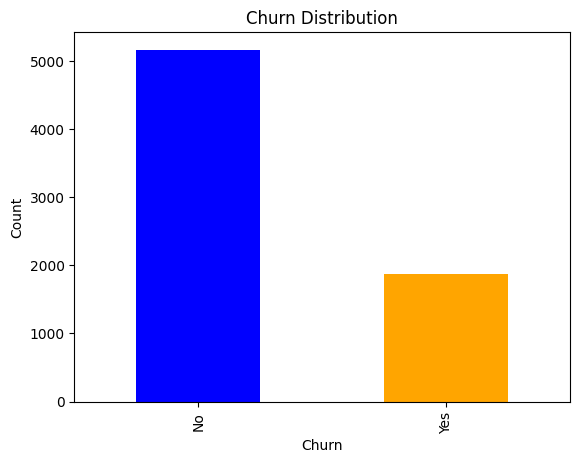

In [8]:
# 4. Class Balance: Churn Distribution
print(df['Churn'].value_counts())
# Visualize the class balance
df['Churn'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

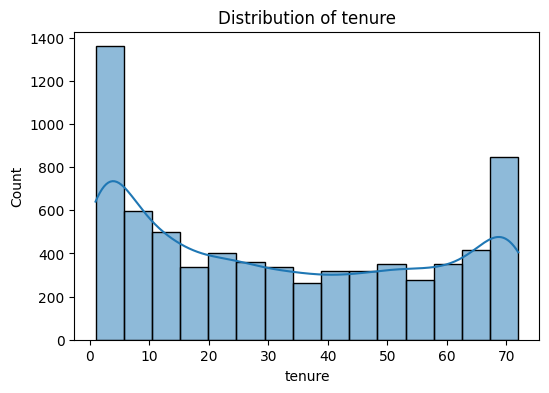

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

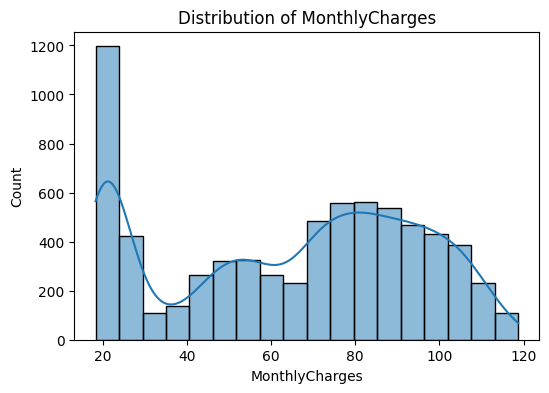

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

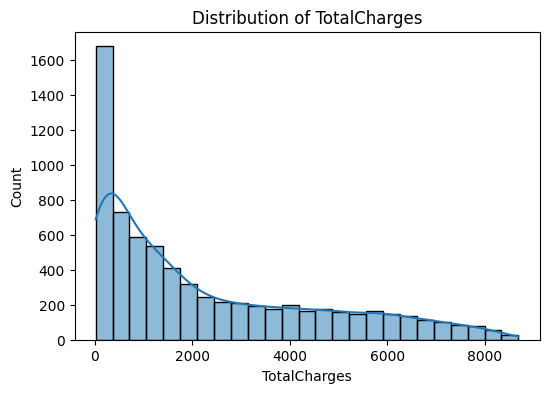

In [9]:
# 5. Numerical Features Distribution

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

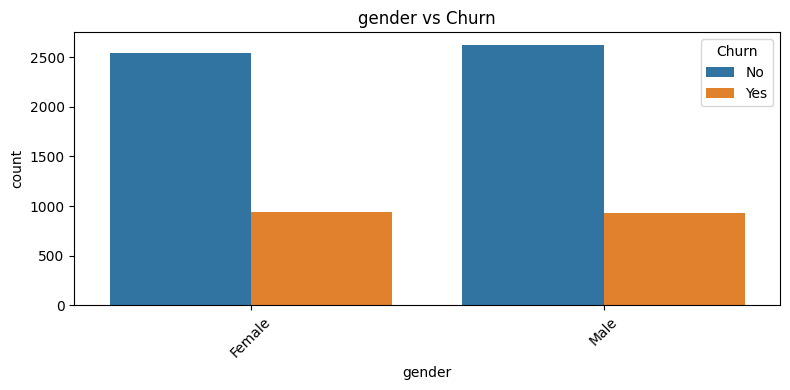

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

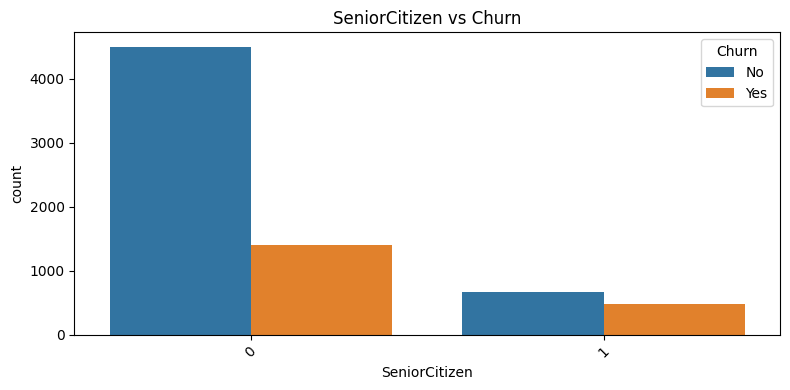

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

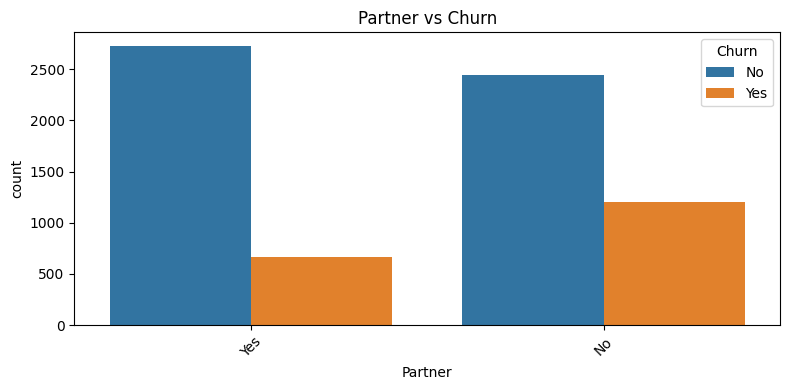

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

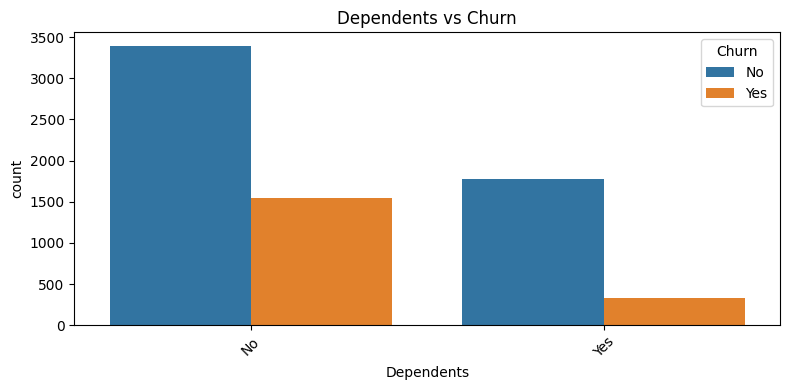

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

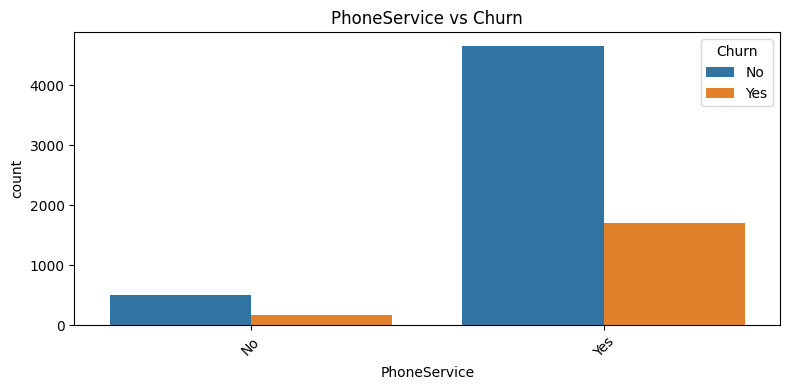

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

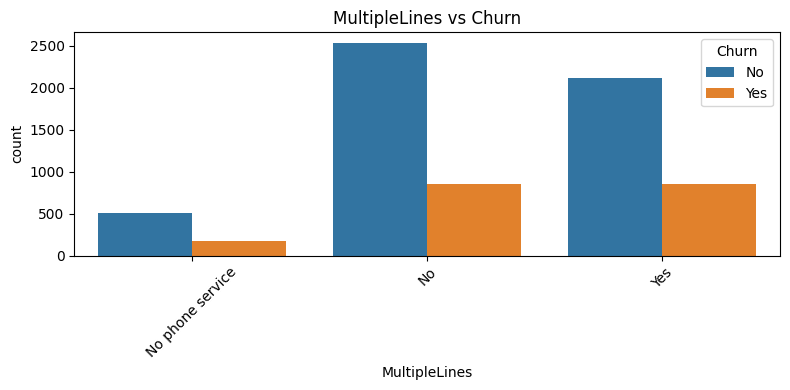

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

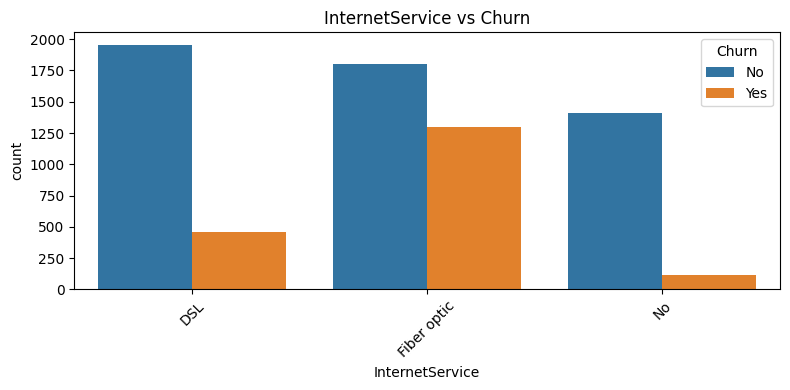

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

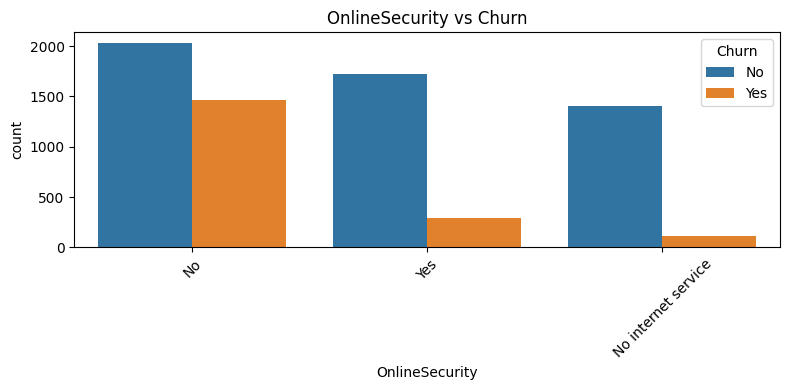

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

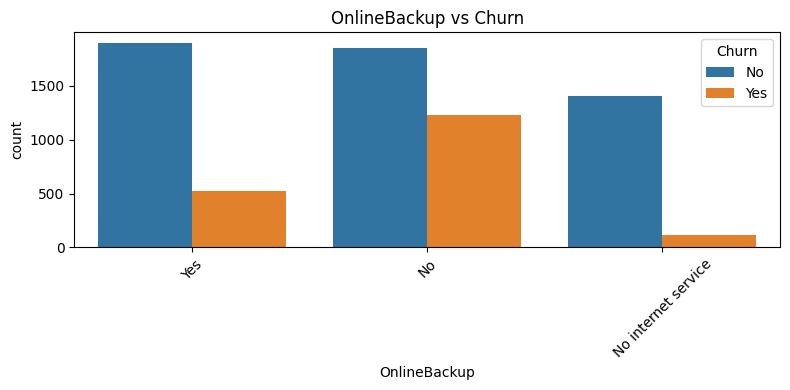

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

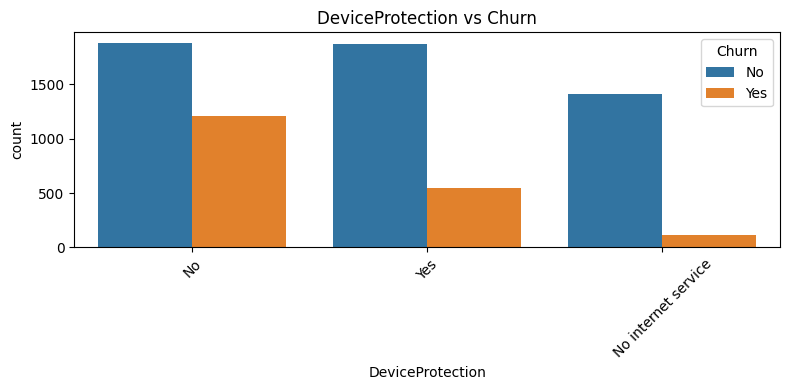

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

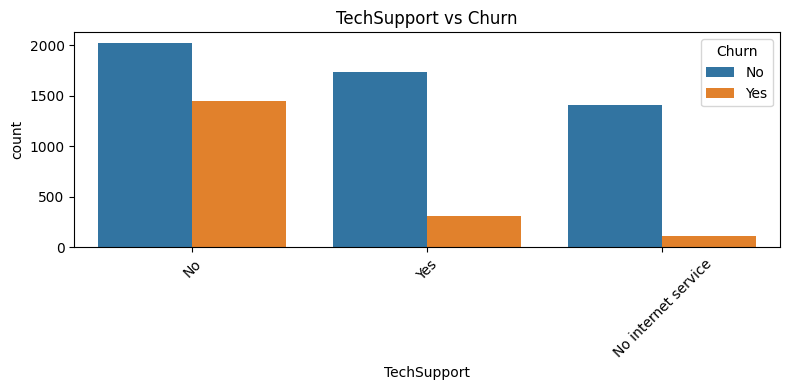

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

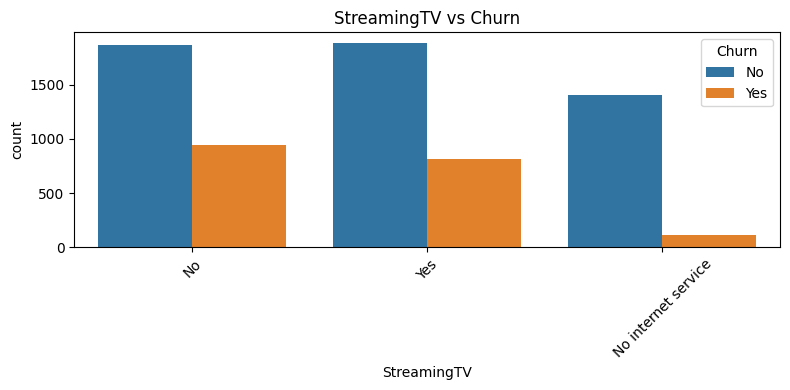

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

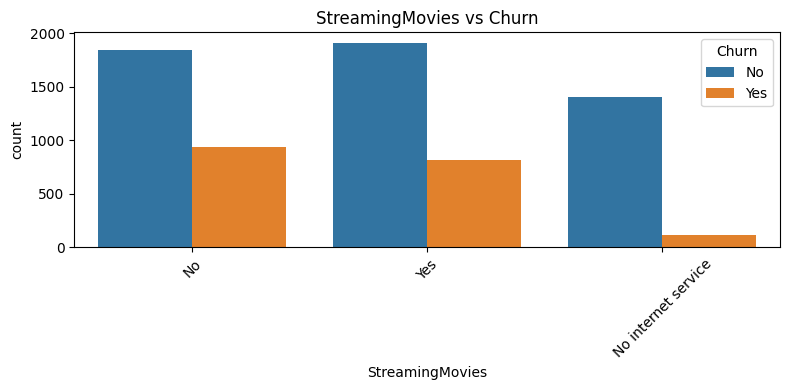

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

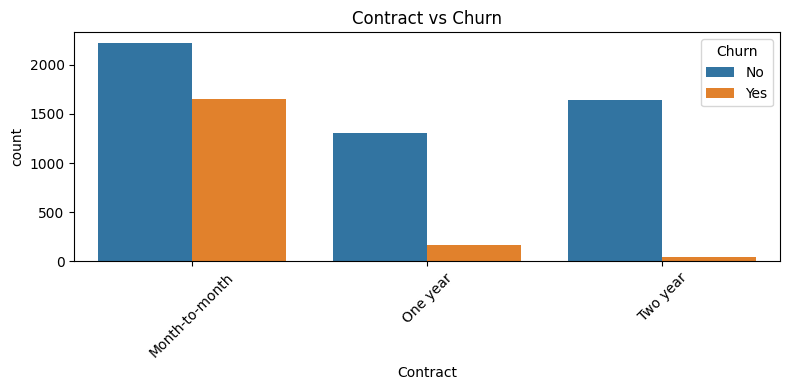

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

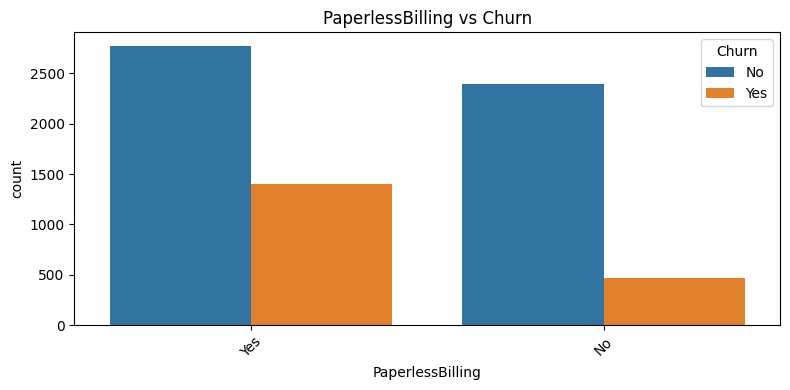

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

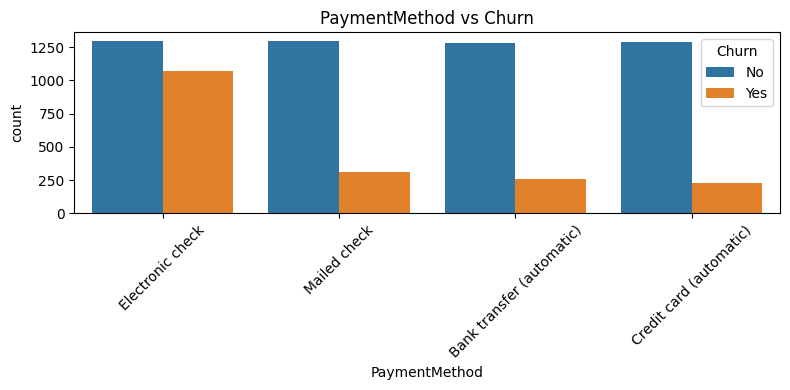

In [10]:
# 6. Churn by Categorical Features

cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Churn')
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

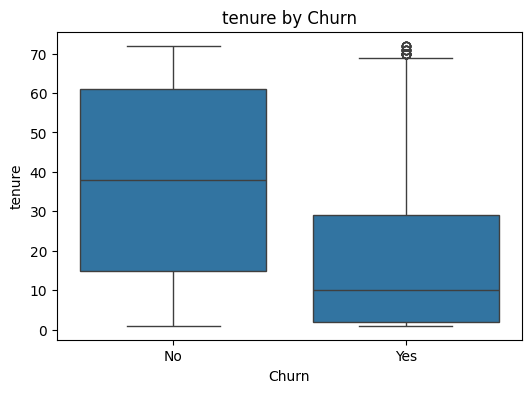

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

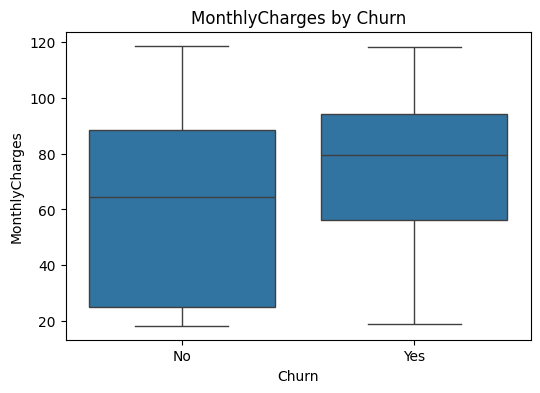

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

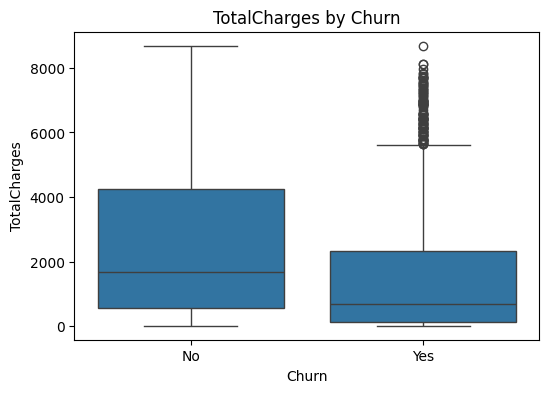

In [11]:
# 7. Churn by Numerical Features

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} by Churn')
    plt.show()

In [12]:
# 9. Encode for Modeling 

df_model = df.copy()

# Encode target
df_model['Churn'] = df_model['Churn'].map({'Yes': 1, 'No': 0})

# Convert categorical features
df_model = pd.get_dummies(df_model.drop(['customerID'], axis=1), drop_first=True)

df_model.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


✅ Full Modeling Pipeline

In [13]:
# 10. Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Drop ID
df.drop(columns=['customerID'], inplace=True)

# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Split data
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [14]:
# 11. Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}




C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



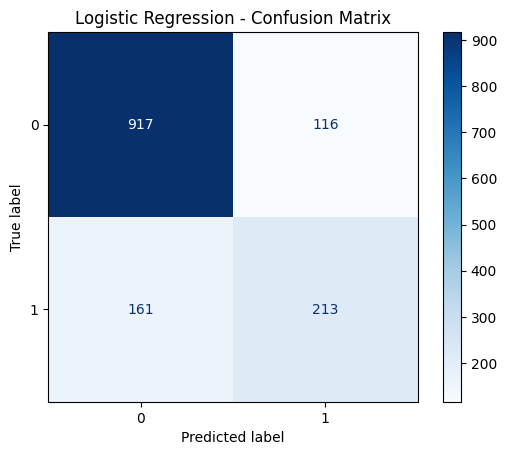

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1033
           1       0.47      0.46      0.47       374

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407



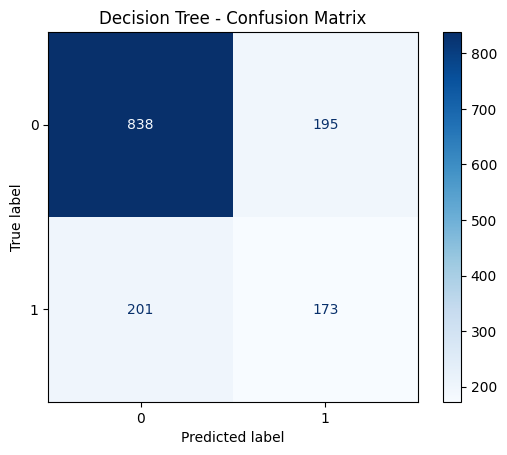

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



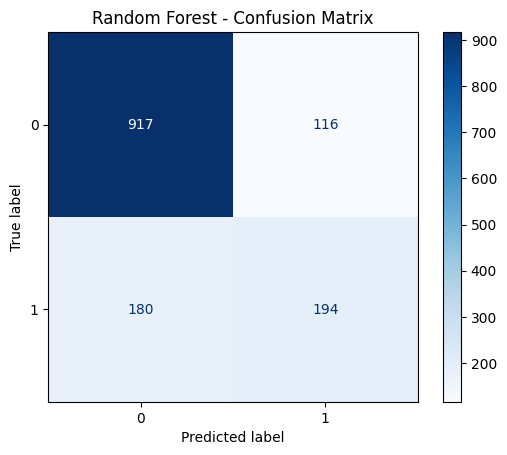

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:43:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407



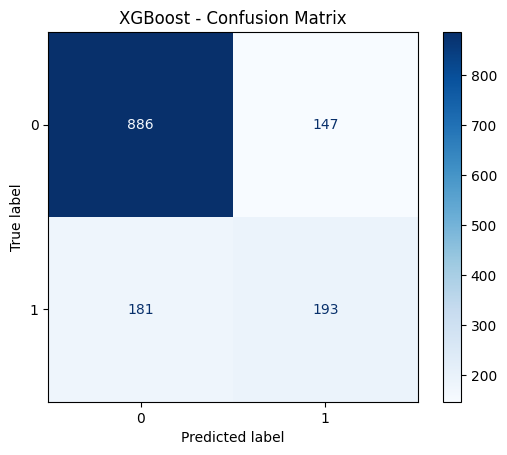

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
=== LightGBM ===
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.55      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



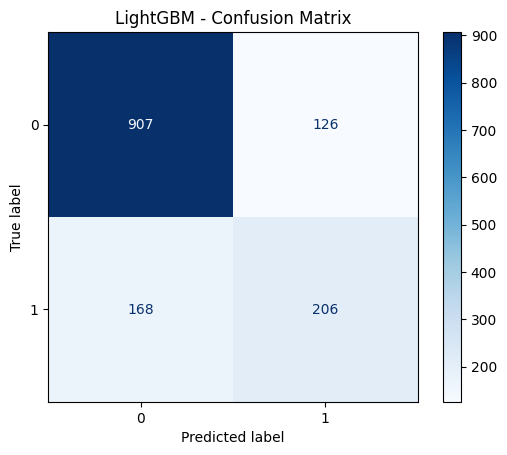

In [15]:
# 12.Train, predict, and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    
    # Store for comparison
    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "report": classification_report(y_test, y_pred, output_dict=True)
    }
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_ if hasattr(model, 'classes_') else [0,1])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

                     Precision    Recall  F1-Score
Logistic Regression   0.647416  0.569519  0.605974
LightGBM              0.620482  0.550802  0.583569
Random Forest         0.625806  0.518717  0.567251
XGBoost               0.567647  0.516043  0.540616
Decision Tree         0.470109  0.462567  0.466307


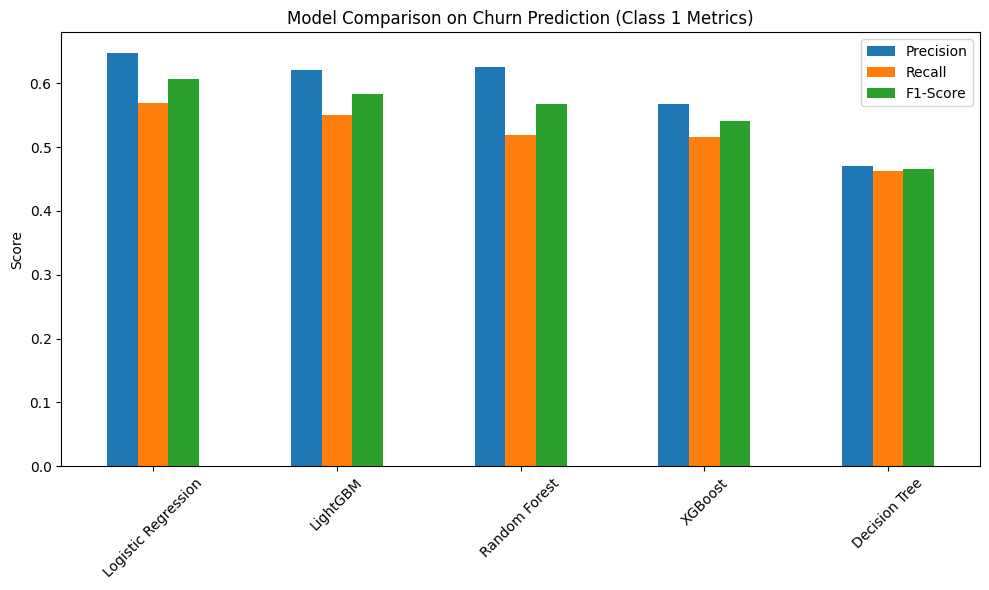

In [16]:
# Compare Model Metrics (e.g. F1-Score)

# Extract F1-scores
model_scores = pd.DataFrame({
    model: {
        "Precision": results[model]['report']['1']['precision'],
        "Recall": results[model]['report']['1']['recall'],
        "F1-Score": results[model]['report']['1']['f1-score']
    }
    for model in results
}).T

model_scores = model_scores.sort_values("F1-Score", ascending=False)
print(model_scores)

# Visual comparison
model_scores.plot(kind='bar', figsize=(10,6))
plt.title("Model Comparison on Churn Prediction (Class 1 Metrics)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Logistic Regression ===
Accuracy: 0.8031
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



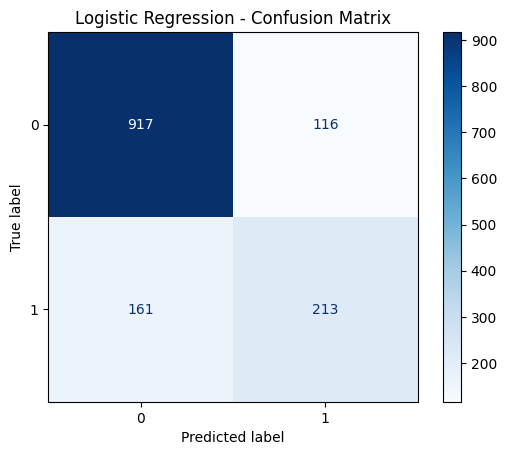

=== Decision Tree ===
Accuracy: 0.7186
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1033
           1       0.47      0.46      0.47       374

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407



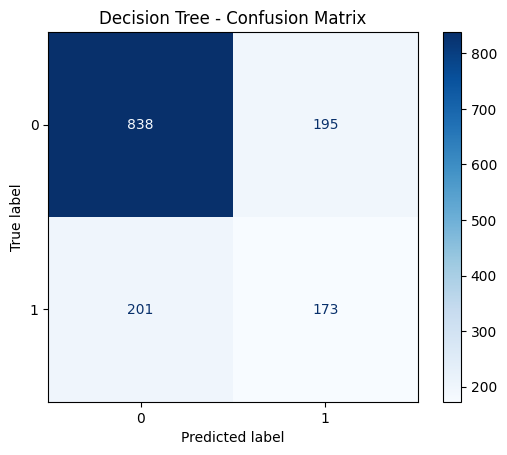

=== Random Forest ===
Accuracy: 0.7896
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



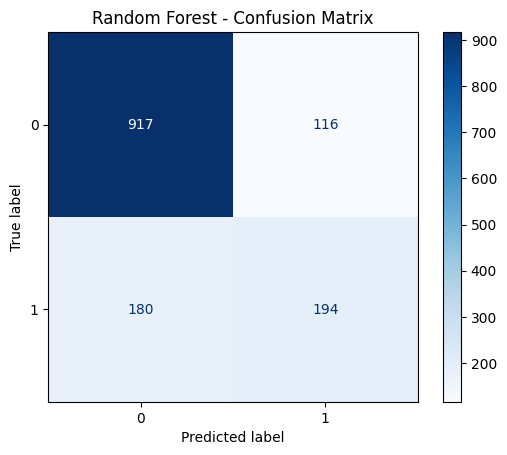

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:43:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost ===
Accuracy: 0.7669
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407



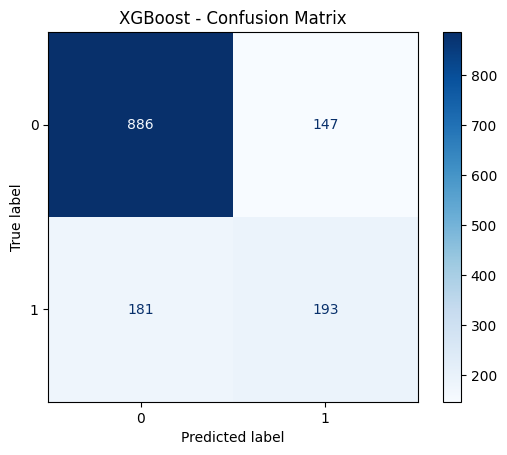

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
=== LightGBM ===
Accuracy: 0.7910
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.55      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



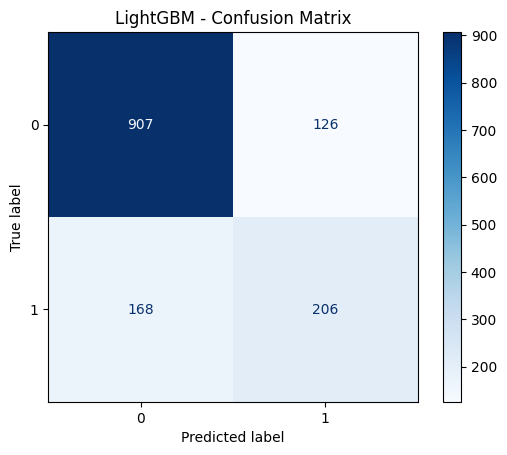

In [17]:
from sklearn.metrics import accuracy_score

# Train, predict, and evaluate with accuracy
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Store for comparison
    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "accuracy": acc,
        "report": classification_report(y_test, y_pred, output_dict=True)
    }
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


In [18]:
# Compare accuracies
accuracy_summary = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": [results[m]["accuracy"] for m in results]
}).sort_values(by="Accuracy", ascending=False)

print(accuracy_summary)


                 Model  Accuracy
0  Logistic Regression  0.803127
4             LightGBM  0.791045
2        Random Forest  0.789623
3              XGBoost  0.766880
1        Decision Tree  0.718550


✅ Feature Importance by Model

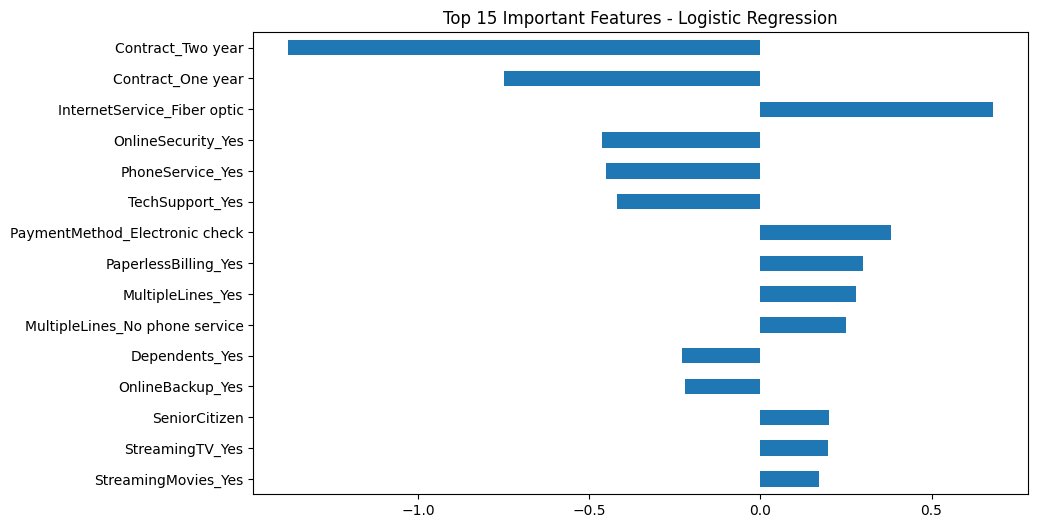

In [19]:
# 1. Logistic Regression – Coefficients as Importance

# Extract feature importance (absolute value of coefficients)
logreg = results['Logistic Regression']['model']
coef = pd.Series(logreg.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,6))
coef.head(15).plot(kind='barh')
plt.title('Top 15 Important Features - Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

In [20]:
# Extract top 15 important features based on absolute coefficient values
top_15_features = coef.head(15)
print(top_15_features)

Contract_Two year                -1.379676
Contract_One year                -0.749234
InternetService_Fiber optic       0.679622
OnlineSecurity_Yes               -0.461769
PhoneService_Yes                 -0.452650
TechSupport_Yes                  -0.419950
PaymentMethod_Electronic check    0.382955
PaperlessBilling_Yes              0.301015
MultipleLines_Yes                 0.278959
MultipleLines_No phone service    0.249357
Dependents_Yes                   -0.229493
OnlineBackup_Yes                 -0.219858
SeniorCitizen                     0.199702
StreamingTV_Yes                   0.197808
StreamingMovies_Yes               0.169724
dtype: float64


Note: 'LogisticRegression' object has no attribute 'feature_importances_'

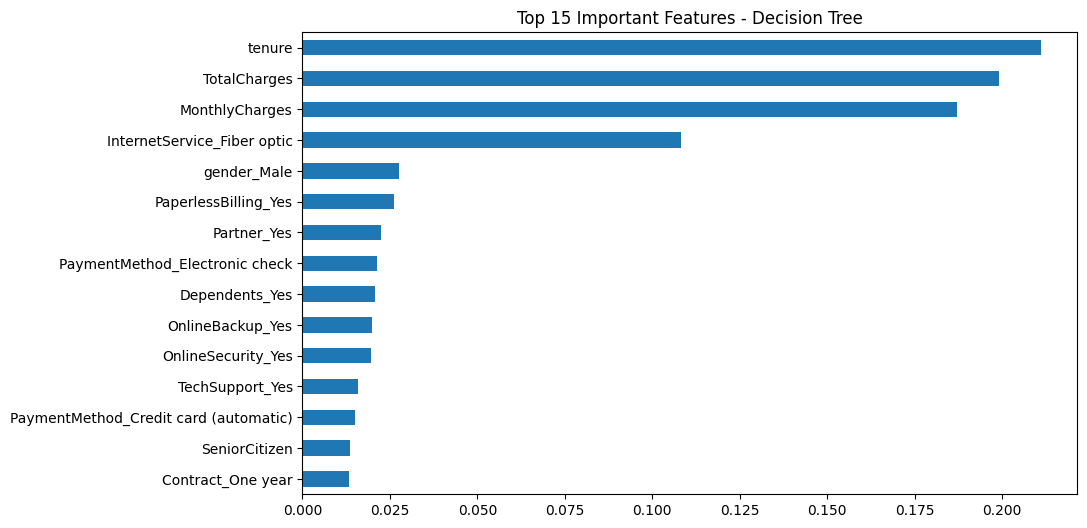

tenure                                   0.210976
TotalCharges                             0.199011
MonthlyCharges                           0.187213
InternetService_Fiber optic              0.108336
gender_Male                              0.027657
PaperlessBilling_Yes                     0.026147
Partner_Yes                              0.022470
PaymentMethod_Electronic check           0.021341
Dependents_Yes                           0.020624
OnlineBackup_Yes                         0.019738
OnlineSecurity_Yes                       0.019721
TechSupport_Yes                          0.015905
PaymentMethod_Credit card (automatic)    0.015107
SeniorCitizen                            0.013576
Contract_One year                        0.013330
dtype: float64


In [21]:
# Extract feature importance for Decision Tree
decision_tree_model = results['Decision Tree']['model']
dt_importances = pd.Series(decision_tree_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
dt_importances.head(15).plot(kind='barh')
plt.title('Top 15 Important Features - Decision Tree')
plt.gca().invert_yaxis()
plt.show()

# Display top 15 features
print(dt_importances.head(15))

In [22]:
#2. Tree-Based Models – Built-in Importance
#Same logic applies for Decision Tree, Random Forest, XGBoost, and LightGBM.

#You can use this function to avoid repetition:

def plot_tree_feature_importance(model, model_name):
    importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

    plt.figure(figsize=(10,6))
    importances.head(15).plot(kind='barh')
    plt.title(f'Top 15 Important Features - {model_name}')
    plt.gca().invert_yaxis()
    plt.show()

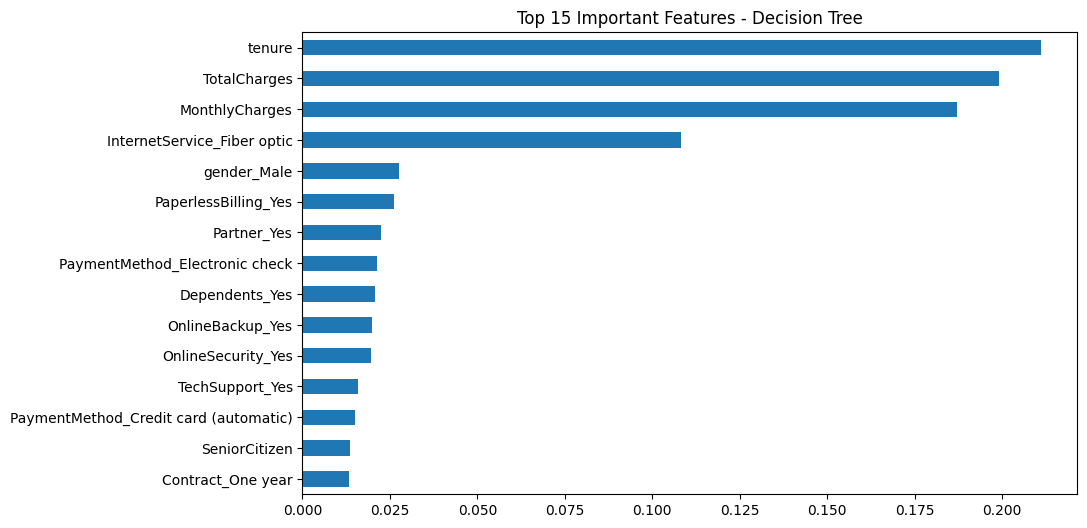

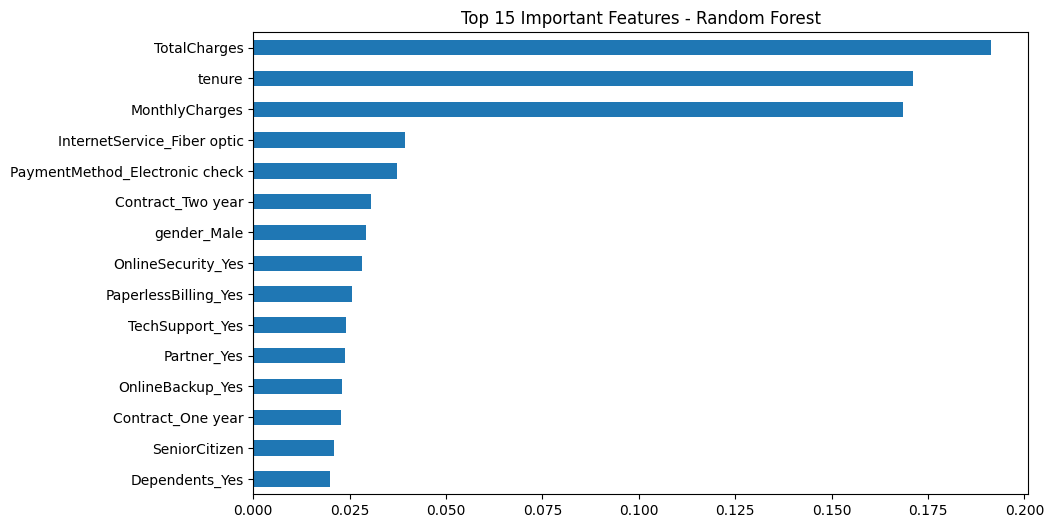

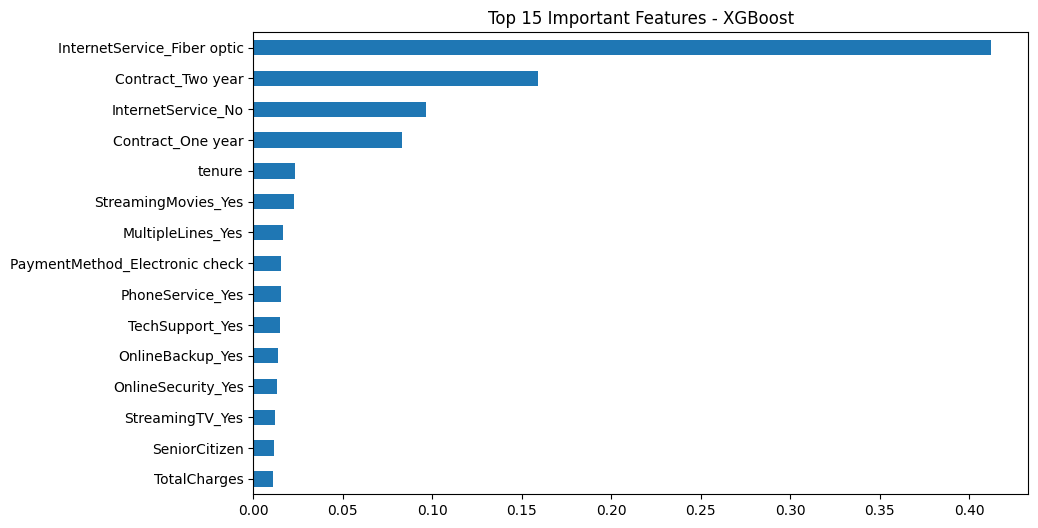

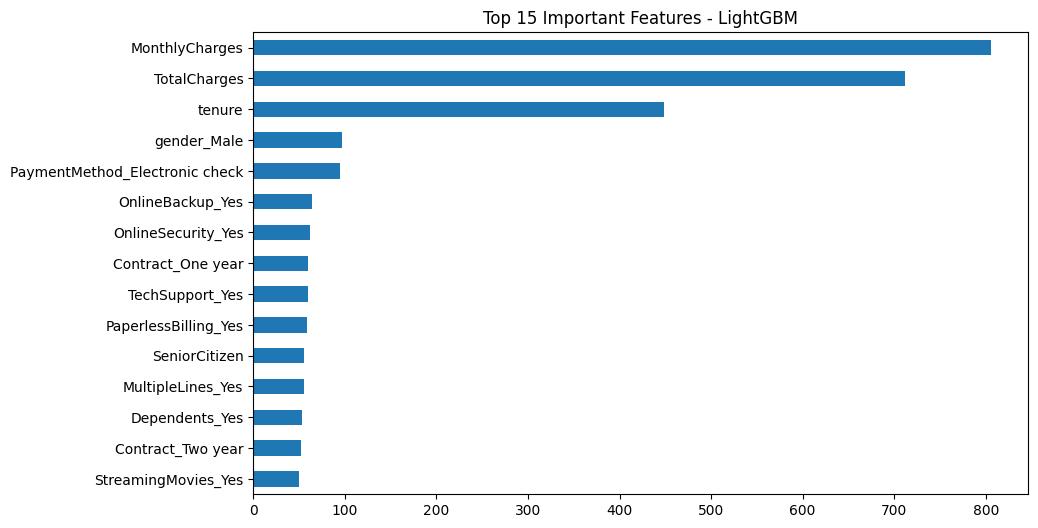

In [23]:
plot_tree_feature_importance(results['Decision Tree']['model'], "Decision Tree")
plot_tree_feature_importance(results['Random Forest']['model'], "Random Forest")
plot_tree_feature_importance(results['XGBoost']['model'], "XGBoost")
plot_tree_feature_importance(results['LightGBM']['model'], "LightGBM")


In [24]:
# Logistic Regression - Top 15 Features
logreg = results['Logistic Regression']['model']
logreg_coef = pd.Series(logreg.coef_[0], index=X.columns).sort_values(key=abs, ascending=False).head(15)
print("Logistic Regression - Top 15 Features:")
print(logreg_coef)

# Decision Tree - Top 15 Features
decision_tree = results['Decision Tree']['model']
dt_importances = pd.Series(decision_tree.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
print("\nDecision Tree - Top 15 Features:")
print(dt_importances)

# Random Forest - Top 15 Features
random_forest = results['Random Forest']['model']
rf_importances = pd.Series(random_forest.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
print("\nRandom Forest - Top 15 Features:")
print(rf_importances)

# XGBoost - Top 15 Features
xgboost = results['XGBoost']['model']
xgb_importances = pd.Series(xgboost.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
print("\nXGBoost - Top 15 Features:")
print(xgb_importances)

# LightGBM - Top 15 Features
lightgbm = results['LightGBM']['model']
lgbm_importances = pd.Series(lightgbm.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
print("\nLightGBM - Top 15 Features:")
print(lgbm_importances)

Logistic Regression - Top 15 Features:
Contract_Two year                -1.379676
Contract_One year                -0.749234
InternetService_Fiber optic       0.679622
OnlineSecurity_Yes               -0.461769
PhoneService_Yes                 -0.452650
TechSupport_Yes                  -0.419950
PaymentMethod_Electronic check    0.382955
PaperlessBilling_Yes              0.301015
MultipleLines_Yes                 0.278959
MultipleLines_No phone service    0.249357
Dependents_Yes                   -0.229493
OnlineBackup_Yes                 -0.219858
SeniorCitizen                     0.199702
StreamingTV_Yes                   0.197808
StreamingMovies_Yes               0.169724
dtype: float64

Decision Tree - Top 15 Features:
tenure                                   0.210976
TotalCharges                             0.199011
MonthlyCharges                           0.187213
InternetService_Fiber optic              0.108336
gender_Male                              0.027657
PaperlessBilling_

In [25]:
top_features_dict = {}


In [26]:
logreg = results['Logistic Regression']['model']
logreg_importance = pd.Series(logreg.coef_[0], index=X.columns)
logreg_top15 = logreg_importance.abs().sort_values(ascending=False).head(15)
top_features_dict['Logistic Regression'] = logreg_top15.index.tolist()


In [27]:
for model_name in ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']:
    model = results[model_name]['model']
    importances = pd.Series(model.feature_importances_, index=X.columns)
    top15 = importances.sort_values(ascending=False).head(15)
    top_features_dict[model_name] = top15.index.tolist()


In [28]:
from pprint import pprint
pprint(top_features_dict)


{'Decision Tree': ['tenure',
                   'TotalCharges',
                   'MonthlyCharges',
                   'InternetService_Fiber optic',
                   'gender_Male',
                   'PaperlessBilling_Yes',
                   'Partner_Yes',
                   'PaymentMethod_Electronic check',
                   'Dependents_Yes',
                   'OnlineBackup_Yes',
                   'OnlineSecurity_Yes',
                   'TechSupport_Yes',
                   'PaymentMethod_Credit card (automatic)',
                   'SeniorCitizen',
                   'Contract_One year'],
 'LightGBM': ['MonthlyCharges',
              'TotalCharges',
              'tenure',
              'gender_Male',
              'PaymentMethod_Electronic check',
              'OnlineBackup_Yes',
              'OnlineSecurity_Yes',
              'Contract_One year',
              'TechSupport_Yes',
              'PaperlessBilling_Yes',
              'SeniorCitizen',
              'Multiple